In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

In [11]:
train_inputs = pd.read_csv("regression-dataset/train_inputs.csv")
train_targets = pd.read_csv("regression-dataset/train_targets.csv").values.ravel() 
test_input = pd.read_csv("regression-dataset/test_targets.csv")
test_targets = pd.read_csv("regression-dataset/test_targets.csv").values.ravel() 


Testing learning rate: 0.001
MSE for 0.001: 1.4200108068030652
Testing learning rate: 0.011
MSE for 0.011: 1.3804496237677026
Testing learning rate: 0.020999999999999998
MSE for 0.020999999999999998: 1.3941174292079705
Testing learning rate: 0.030999999999999996
MSE for 0.030999999999999996: 1.3902778269469092
Testing learning rate: 0.040999999999999995
MSE for 0.040999999999999995: 1.4034040187701955
Testing learning rate: 0.05099999999999999
MSE for 0.05099999999999999: 1.4128483423268907
Testing learning rate: 0.06099999999999999
MSE for 0.06099999999999999: 1.3915067256317237
Testing learning rate: 0.071
MSE for 0.071: 1.3513714197000546
Testing learning rate: 0.08099999999999999
MSE for 0.08099999999999999: 1.3534014499522673
Testing learning rate: 0.09099999999999998
MSE for 0.09099999999999998: 1.4029886456417628
Testing learning rate: 0.10099999999999998
MSE for 0.10099999999999998: 1.4147843069267312


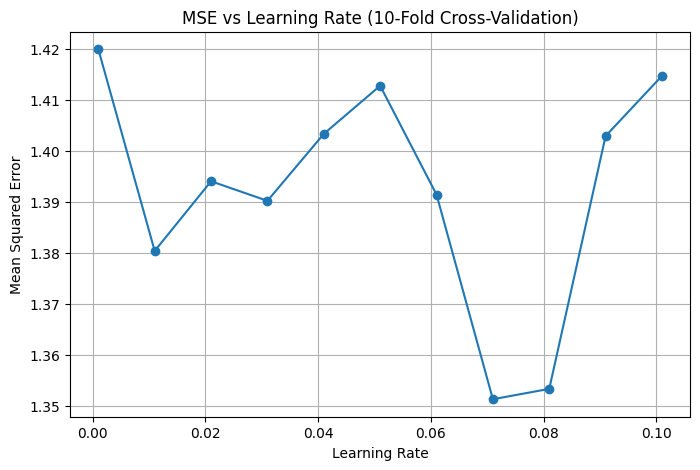

Best Learning Rate: 0.071
Cross-Validation MSE: 1.3513714197000546
Test MSE: 1.3942532411477504


In [12]:
# Load the dataset
train_inputs = pd.read_csv("regression-dataset/train_inputs.csv").values  # Convert DataFrame to NumPy array
train_targets = pd.read_csv("regression-dataset/train_targets.csv").values.ravel()  # Convert targets to 1D array

# Define range of learning rates
learning_rates = np.arange(0.001, 0.11, 0.01)  # Adjusted learning rate range

# Perform 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

mse_values = []  # Store mean squared errors for each learning rate

for lr in learning_rates:
    print(f"Testing learning rate: {lr}")
    model = SGDRegressor(learning_rate='constant', eta0=lr, max_iter=1000, tol=1e-3, random_state=42)
    mse = -cross_val_score(model, train_inputs, train_targets, cv=kf, scoring='neg_mean_squared_error').mean()
    print(f"MSE for {lr}: {mse}")
    mse_values.append(mse)

# Find best learning rate
best_lr_index = np.argmin(mse_values)
best_learning_rate = learning_rates[best_lr_index]
best_mse = mse_values[best_lr_index]

# Train final model using best learning rate
final_model = SGDRegressor(learning_rate='constant', eta0=best_learning_rate, max_iter=1000, tol=1e-3, random_state=42)
final_model.fit(train_inputs, train_targets)

# Compute test MSE
test_input = pd.read_csv("regression-dataset/test_inputs.csv").values
test_targets = pd.read_csv("regression-dataset/test_targets.csv").values.ravel()
final_predictions = final_model.predict(test_input)
test_mse = mean_squared_error(test_targets, final_predictions)

# Plot Learning Rate vs MSE
plt.figure(figsize=(8, 5))
plt.plot(learning_rates, mse_values, marker='o', linestyle='-')
plt.xlabel("Learning Rate")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Learning Rate (10-Fold Cross-Validation)")
plt.grid()
plt.show()

# Print results
print(f"Best Learning Rate: {best_learning_rate}")
print(f"Cross-Validation MSE: {best_mse}")
print(f"Test MSE: {test_mse}")
